# Introduction to Data Science
## Homework 3

Student Name: HenryTse

Student Netid: ht688
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the dataset's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is to split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
#Place your code here
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

churn = pd.read_csv("cell2cell_data.csv")

train_size = 0.8 
np.random.seed(3462) 

index = np.random.rand(len(churn)) < train_size 
train_churn = churn[index]
test_churn = churn[~index]

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
#Place your code here
train_target = train_churn.loc[:,'churndep']
train_features = train_churn.loc[:,'revenue':'retcalls']
decision_tree = DecisionTreeClassifier(criterion="entropy")
trained_tree = decision_tree.fit(train_features,train_target)

3\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

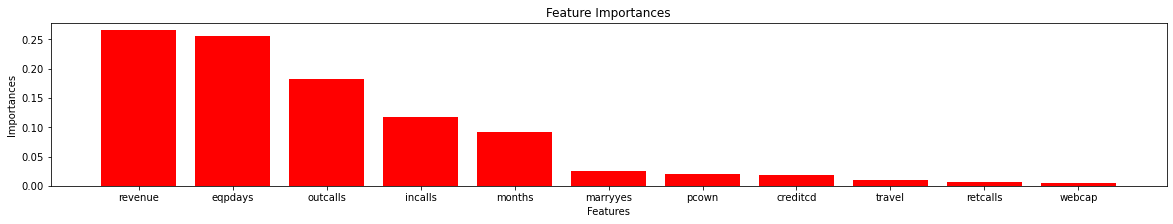

In [3]:
#Place your code here
names = list(train_features)
length = np.arange(len(list(train_features)))
importances = pd.DataFrame({"Features":list(train_features),"Importances":trained_tree.feature_importances_})
importances.sort_values(by='Importances',ascending=False,inplace=True)

plt.figure(figsize=(20,3))
plt.title("Feature Importances")
plt.bar(length,importances["Importances"],color="red",align="center")
plt.xticks(length,importances["Features"])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.show()

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [4]:
#Place your code here 
column_names = list(churn[importances[:3]["Features"]])
column_names.extend(["churndep"])
churn[column_names].corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.222074,0.500709,-0.013370
eqpdays,-0.222074,1.000000,-0.244112,0.112821
outcalls,0.500709,-0.244112,1.000000,-0.037071
churndep,-0.013370,0.112821,-0.037071,1.000000


<p>
<span style="color:blue">
Place your response here
</span>
</p>
The three most important features are revenue, eqpdays, and outcalls. 
Outcalls and revenue is postively correlated, as outcalls increases revenue will also increase mildly.
Eqpdays and revenue is negatively correlated, as eqpdays decreases revenue will slightly increase.
Outcalls and eqpdays is also negatively correlated, as outcalls decreases eqpdays will slightly increase.

Looking at the top three drivers of churn. As our revenue per customer increases, they would be less likely to churn. Long terms customers are usually satifisied with the service, and they would be more willing to spend more on services provided by our company; however, the correlation between these features are insignificant. 
Equipment longevity would cause the customer to be more likely to churn. Ensuring that customers continue to order our products will lead to more loyal customers (customer longevity)
The more outgoing calls are made by customers, the less likely they are to churn. Using our service would indicate that the customer is satifisfied, satisfied customers are less likely to churn. The relationship between these two features is also insignificant.

5\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? Remember: accuracy is the fraction of predictions whose labels were gotten right by the model. What conclusions can you derive from this?

(2 Points)

In [5]:
#Place your code here
# Test dataset
test_features = test_churn.loc[:,'revenue':'retcalls'] 
test_target = test_churn.loc[:,'churndep']

# Target dataset
test_results = trained_tree.predict(test_features)
train_results = trained_tree.predict(train_features)

test_accuracy = accuracy_score(test_target,test_results)
train_accuracy = accuracy_score(train_target,train_results)
print("Training Accuracy = %.3f%%" %(train_accuracy * 100))
print("Test Accuracy = %.3f%%" %(test_accuracy * 100))

Training Accuracy = 99.987%
Test Accuracy = 53.838%


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [6]:
#Place your code here
sample_leaf = np.arange(80,1000,100)
sample_split = np.arange(80,1000,100)

2\. Explain what your reasoning was for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
Place your response here
</span>
</p>
Significant difference between the test and training accuracy would indicate overfitting in our model.
We changed min_samples_split to a higher value than the default value since the low default value causes our model to overfit on the training data. We select a larger value since the size of the data is large.
We changed higher min_samples_leaf to a higher valiue than the default value. We won't select a value that is too high as it can increase the bias and decrease the variance.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

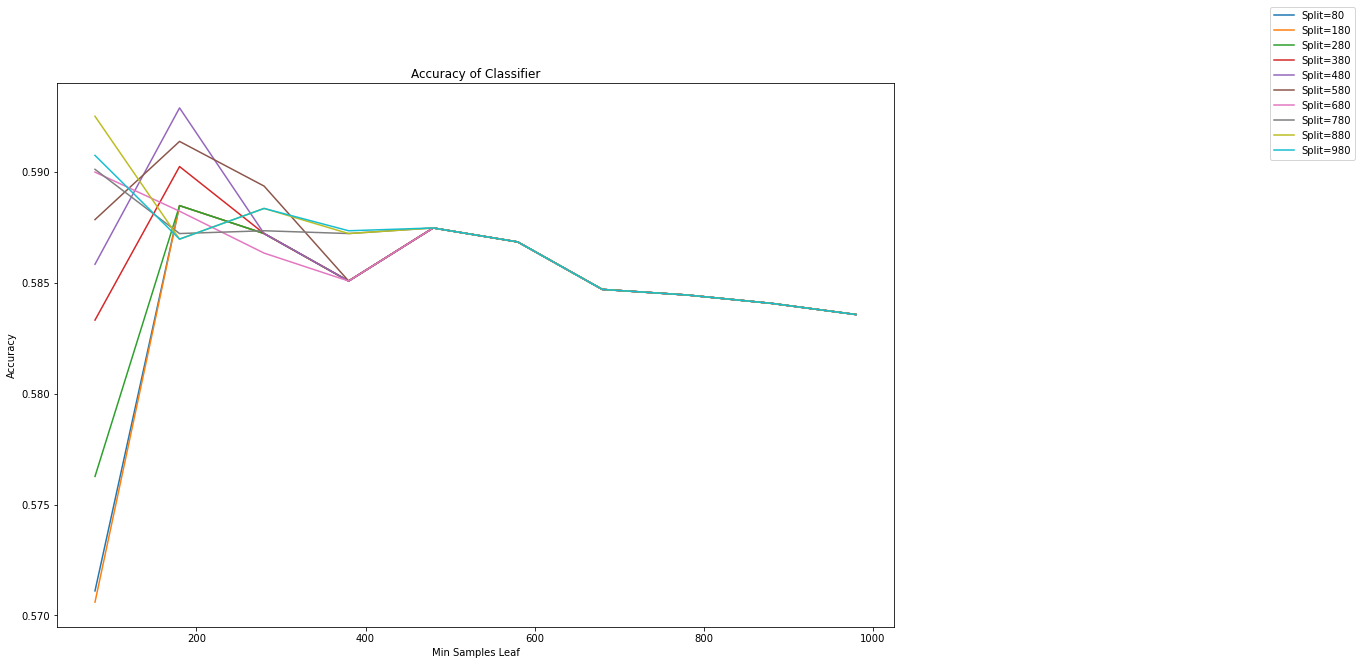

Best Sample Leaf Size is 180 and Best Sample Split Size is 480
Best Accuracy is 59.287691920463125


In [7]:
#Place your code here
max_samples_leaf = 0 
max_samples_split = 0
max_accuracy = 0
plt.figure(figsize=(15,10))
for split in sample_split:
    results = []
    for leaf in sample_leaf:
        classifier = DecisionTreeClassifier(criterion= 'entropy', min_samples_split=split, min_samples_leaf=leaf).fit(train_features,train_target)
        predict = classifier.predict(test_features)
        accuracy = accuracy_score(test_target, predict)
        results.append(accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_sample_leaf = leaf
            max_sample_split = split
    plt.plot(sample_leaf, results, label = f"Split={split}")
    
plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
plt.title('Accuracy of Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Leaf')
plt.show()
print("Best Sample Leaf Size is %d and Best Sample Split Size is %d" %(max_sample_leaf,max_sample_split))
print("Best Accuracy is " + str(max_accuracy * 100))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
Place your response here
</span>
</p>
Best Sample Leaf Size is 180 and Best Sample Split Size is 480

Best Accuracy is 59.29%

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
Place your response here
</span>
</p>
Churn prediction model is essential for any type of good business. Analyzing customer churn prediction models will allow businesses to create different approaches to retain existing customers. Attracting new customers would be a lot more difficult than retaining existing ones, as you may need to convince the customer to switch services/products. This would be very costly as you would need to spend on different ad campaigns and promotions in order to entice new customers. 

By identifying top drivers of churn, a company may focus their resources on those specific fields. A way to improve churn using this model would be to reward existing customers identified by this model with discounts or promotion. This will make the customer feel that they are being rewarded for their loyalty resulting in prolong use of the company's product/services.

### Part 3: Model selection with cross-validation (5 points)
In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [8]:
df = pd.read_csv('cell2cell_data.csv')
df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


In [9]:
#Place your code here
#Uncomment line below
from sklearn.model_selection import KFold
def xValDecisionTree(dataset, label_name, k, max_depth_sequence):
    x_values = dataset.values
    y_labels = df[label_name].values
    k_fold = KFold(n_splits=k,shuffle=True) 
    indx = 0
    accs = {}
    for train_indx, test_indx in k_fold.split(x_values):
        acc_scores = []
        indx += 1
        train_values, test_values = x_values[train_indx], x_values[test_indx]
        train_labels, test_labels = y_labels[train_indx], y_labels[test_indx]
        for max_depth in max_depth_sequence:
            clf = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth).fit(train_values,train_labels)
            pred_labels = clf.predict(test_values)
            acc_scores.append(accuracy_score(test_labels,pred_labels))
        accs[indx] = acc_scores
    return(accs)

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [10]:
#Place your code and answers here. You can create more cells if you want.
max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]
accs = xValDecisionTree(df.iloc[:,:-1], 'churndep', 10, max_depth_sequence)
fold = 1
for key in accs.keys():
    print('Fold',fold)
    print('Accuracy Mean = ',np.mean(accs[key]))
    print('SD = ',np.std(accs[key]))
    print('Mean +/- SD = ',np.mean(accs[key])+np.std(accs[key]))
    fold += 1

Fold 1
Accuracy Mean =  0.5660419455600179
SD =  0.02319956870050566
Mean +/- SD =  0.5892415142605235
Fold 2
Accuracy Mean =  0.5576193663543062
SD =  0.02094212383930323
Mean +/- SD =  0.5785614901936095
Fold 3
Accuracy Mean =  0.5527108433734941
SD =  0.028517660006316423
Mean +/- SD =  0.5812285033798105
Fold 4
Accuracy Mean =  0.5589589086952883
SD =  0.023348184359786688
Mean +/- SD =  0.582307093055075
Fold 5
Accuracy Mean =  0.556504031020727
SD =  0.024264939041202256
Mean +/- SD =  0.5807689700619293
Fold 6
Accuracy Mean =  0.5522079950902447
SD =  0.02332751032402845
Mean +/- SD =  0.5755355054142731
Fold 7
Accuracy Mean =  0.5599631768348816
SD =  0.02482871176888191
Mean +/- SD =  0.5847918886037635
Fold 8
Accuracy Mean =  0.5532680559042596
SD =  0.031007654087521055
Mean +/- SD =  0.5842757099917807
Fold 9
Accuracy Mean =  0.5596005244511395
SD =  0.02726372845643105
Mean +/- SD =  0.5868642529075706
Fold 10
Accuracy Mean =  0.5547186654392279
SD =  0.02746481882995836
M

3. Fold 9 has the highest accuracy mean
4. Fold 9 also has the highest ranges (mean +/- std)
This may suggest the variability in our sample isn't diverse. Our dataset may be biased and that we would need more samples to dictate our model. Limitations of standard deviation in this scenario is that if the data is too spread out, there may be outliers that affect our results. If the data is too thin, there may not be enough variation and cause bias in our model
5. A high depth value would cause overfitting, while a low depth value will cause the model to underfit
